In [2]:
!pip install opencv-python

In [32]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:
# Define the path to your dataset
dataset_path = "./PlantVillage"

In [3]:
# Initialize empty lists to store images and labels
data = []
labels = []

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [5]:
# Loop through the subdirectories in the dataset folder
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
            image = cv2.resize(image, (256, 256))  # Resize the image to a fixed size
            data.append(image)
            labels.append(category)

In [6]:
# Convert the lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

In [22]:
# Define class names
class_names = ["Potato___Early_blight", "Potato___healthy", "Potato___Late_blight"]

In [23]:

# Create a dataset from the file paths
list_of_image_paths = []  
list_of_labels = []  

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            list_of_image_paths.append(image_path)
            list_of_labels.append(category)

In [24]:
# Convert class names to a dictionary for label conversion
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Convert the labels to integers
list_of_labels = [class_name_to_label[label] for label in list_of_labels]

# Create a dataset using TensorFlow
dataset = tf.data.Dataset.from_tensor_slices((list_of_image_paths, list_of_labels))

In [25]:
# Define a function to load and preprocess images
def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  
    image = tf.image.resize(image, (256, 256))  
    return image, label

In [26]:
# Apply the load_and_preprocess_image function to each item in the dataset
dataset = dataset.map(load_and_preprocess_image)

In [27]:
# Shuffle and batch the dataset
batch_size = 32
dataset = dataset.shuffle(buffer_size=len(list_of_image_paths))
dataset = dataset.batch(batch_size)

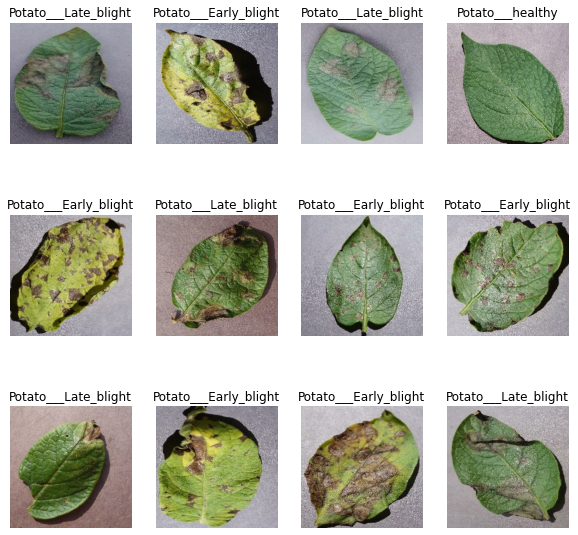

In [30]:
# Plot the images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):  
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")

plt.show()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [34]:
# next we are going to feature sacle x values
scaler = StandardScaler()
x = scaler.fit_transform(X_train)
x[0:5]

array([[ 1.35477923,  1.46446817,  1.31529593, ..., -0.16921906,
        -0.08836116, -0.01052069],
       [ 1.45427321,  1.6222642 ,  1.62944821, ...,  0.18610793,
         0.31199747,  0.44869213],
       [ 0.29351013, -0.08193291, -0.19263504, ..., -0.20475176,
        -0.48871979, -0.53533534],
       [ 0.75781536,  0.77016565,  0.8440675 , ..., -1.91032133,
        -2.12351753, -1.88017288],
       [ 0.22718081,  0.10742233, -0.06697413, ..., -1.19966734,
        -1.22271061, -1.38815914]])

In [35]:
# Print the shapes of the resulting arrays to verify the split
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training images shape: (1721, 196608)
Training labels shape: (1721,)
Testing images shape: (431, 196608)
Testing labels shape: (431,)


In [8]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [9]:
# Initialize the KNN classifier
k = 5 
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [10]:
len(dataset_path)

14

In [11]:
# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [13]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6125290023201856


In [14]:
# next we looking for best K values for the knn algorithm.
# Here we are getting 1 to 10 k values and getting correctly predicted values count

accuracies = []
# Initialize a list to store accuracy values for different values of n_neighbors (k)
accuracies = []

# Loop through different values of k (n_neighbors)
for k in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

In [16]:
accuracies

[0.5916473317865429,
 0.6682134570765661,
 0.5962877030162413,
 0.6473317865429234,
 0.6125290023201856,
 0.642691415313225,
 0.5939675174013921,
 0.6264501160092807,
 0.6125290023201856,
 0.6264501160092807]

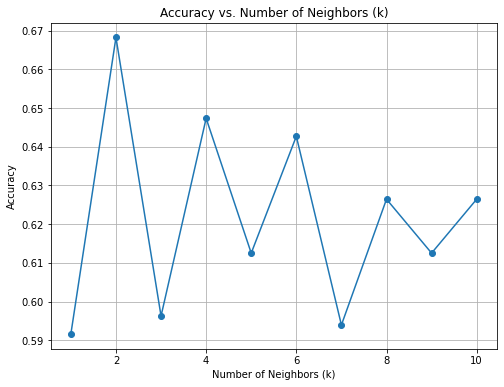

Best k value: 2
Highest accuracy: 0.6682134570765661


In [37]:
# Plot the accuracy curve
k_values = []

for i in range(1,11):
  k_values.append(i)

# Find the k value with the highest accuracy
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

# Plot the accuracies for each k value
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print(f'Best k value: {best_k}')
print(f'Highest accuracy: {best_accuracy}')

In [39]:
# Create a KNN classifier best k value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the model using the training data
knn.fit(X_train, y_train)

# Test the model using the testing data
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6682134570765661


In [40]:
predicted_labels = knn.predict(X_test)
actual_labels = y_test

In [41]:
predicted_labels

array(['Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato___Early_blight',
       'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato___Early_blight',
       'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato___Early_blight',
       'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato___Late_blight',
       'Potato___Late_blight', 'Potato__

In [42]:
print(classification_report(y_test, predicted_labels, target_names=class_names))

                       precision    recall  f1-score   support

Potato___Early_blight       0.97      0.39      0.56       196
     Potato___healthy       0.60      0.99      0.74       209
 Potato___Late_blight       0.80      0.15      0.26        26

             accuracy                           0.67       431
            macro avg       0.79      0.51      0.52       431
         weighted avg       0.78      0.67      0.63       431



In [71]:
def predict_new_image(image_path):
    # Load and preprocess the new image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return None

    # Resize the image to match the dimensions of the training data
    image = cv2.resize(image, (256, 256))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = image.reshape(1, -1)  # Flatten and reshape the image

    # Make a prediction using the KNN classifier
    prediction = knn_classifier.predict(image)

    # Map the predicted label (string) to its corresponding class index
    predicted_class_index = class_name_to_label[prediction[0]]

    # Retrieve the class name from the class_names list
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

In [80]:
new_image_path = "./PlantVillage/Potato___healthy/1106c3fc-92cb-41a6-a6c6-8f08b9b45108___RS_HL 1914.JPG"
predicted_class = predict_new_image(new_image_path)
print("Predicted Class:", predicted_class)

Predicted Class: Potato___Late_blight


In [81]:
import joblib

# Save the KNN model to a file
model_filename = "potatoDiseaseknn_model.pkl"
joblib.dump(knn_classifier, model_filename)

['potatoDiseaseknn_model.pkl']